In [10]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [12]:
flights = pd.read_csv('/Users/chipego/Downloads/flights.csv',na_values=['-'])

/var/folders/sv/d17v64fx33j6dfgwbpf9l9bw0000gn/T/ipykernel_5743/2544433952.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('/Users/chipego/Downloads/flights.csv',na_values=['-'])


In [14]:
flights.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
flights.shape

(5819079, 31)

In [18]:
flights['AIRLINE'].value_counts()

AIRLINE
WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: count, dtype: int64

## Data Exploratory
Before starting with data exploration, it is a good idea to take a look at all the columns with your end goal in mind, and get rid of the ones that you will not use when training your model.

For nowm we will include more than what we need though. Because the extra information will be helpful for data exploration and cleaning.

## Objective : Predict cause of delays

In [20]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [22]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLED', 'CANCELLATION_REASON']]

In [26]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
SCHEDULED_TIME               6
ELAPSED_TIME            105071
ARRIVAL_DELAY           105071
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
CANCELLED                    0
CANCELLATION_REASON    5729195
dtype: int64

In [28]:
flights[flights['ARRIVAL_DELAY'].isna()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
32,2015,1,1,4,AS,136,ANC,SEA,135,NaN,NaN,600,NaN,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
42,2015,1,1,4,AA,2459,PHX,DFW,200,NaN,NaN,500,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
68,2015,1,1,4,OO,5254,MAF,IAH,510,NaN,NaN,637,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
82,2015,1,1,4,MQ,2859,SGF,DFW,525,NaN,NaN,700,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
90,2015,1,1,4,OO,5460,RDD,SFO,530,NaN,NaN,700,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818157,2015,12,31,4,UA,222,SFO,LAX,2000,NaN,NaN,2136,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
5818160,2015,12,31,4,WN,5296,MDW,ABQ,2000,2013.0,13.0,2215,2325.0,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5818318,2015,12,31,4,AA,2245,MIA,SAN,2019,NaN,NaN,2256,NaN,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
5818777,2015,12,31,4,NK,416,FLL,IAG,2155,NaN,NaN,50,NaN,175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A


In [30]:
na_values = flights[flights['AIR_SYSTEM_DELAY'].isna() & flights['SECURITY_DELAY'].isna() & flights['AIRLINE_DELAY'].isna() & flights['LATE_AIRCRAFT_DELAY'].isna() & flights['WEATHER_DELAY'].isna()]
na_values

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,430,408.0,205.0,194.0,-22.0,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,750,741.0,280.0,279.0,-9.0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,806,811.0,286.0,293.0,5.0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,805,756.0,285.0,281.0,-9.0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,320,259.0,235.0,215.0,-21.0,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,LAX,BOS,2359,2355.0,-4.0,819,753.0,320.0,298.0,-26.0,NaN,NaN,NaN,NaN,NaN,0,NaN
5819075,2015,12,31,4,B6,745,JFK,PSE,2359,2355.0,-4.0,446,430.0,227.0,215.0,-16.0,NaN,NaN,NaN,NaN,NaN,0,NaN
5819076,2015,12,31,4,B6,1503,JFK,SJU,2359,2350.0,-9.0,440,432.0,221.0,222.0,-8.0,NaN,NaN,NaN,NaN,NaN,0,NaN
5819077,2015,12,31,4,B6,333,MCO,SJU,2359,2353.0,-6.0,340,330.0,161.0,157.0,-10.0,NaN,NaN,NaN,NaN,NaN,0,NaN


array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'FLIGHT_NUMBER'}>,
        <Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>],
       [<Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'SCHEDULED_TIME'}>,
        <Axes: title={'center': 'ELAPSED_TIME'}>],
       [<Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>],
       [<Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>, <Axes: >]], dtype=object)

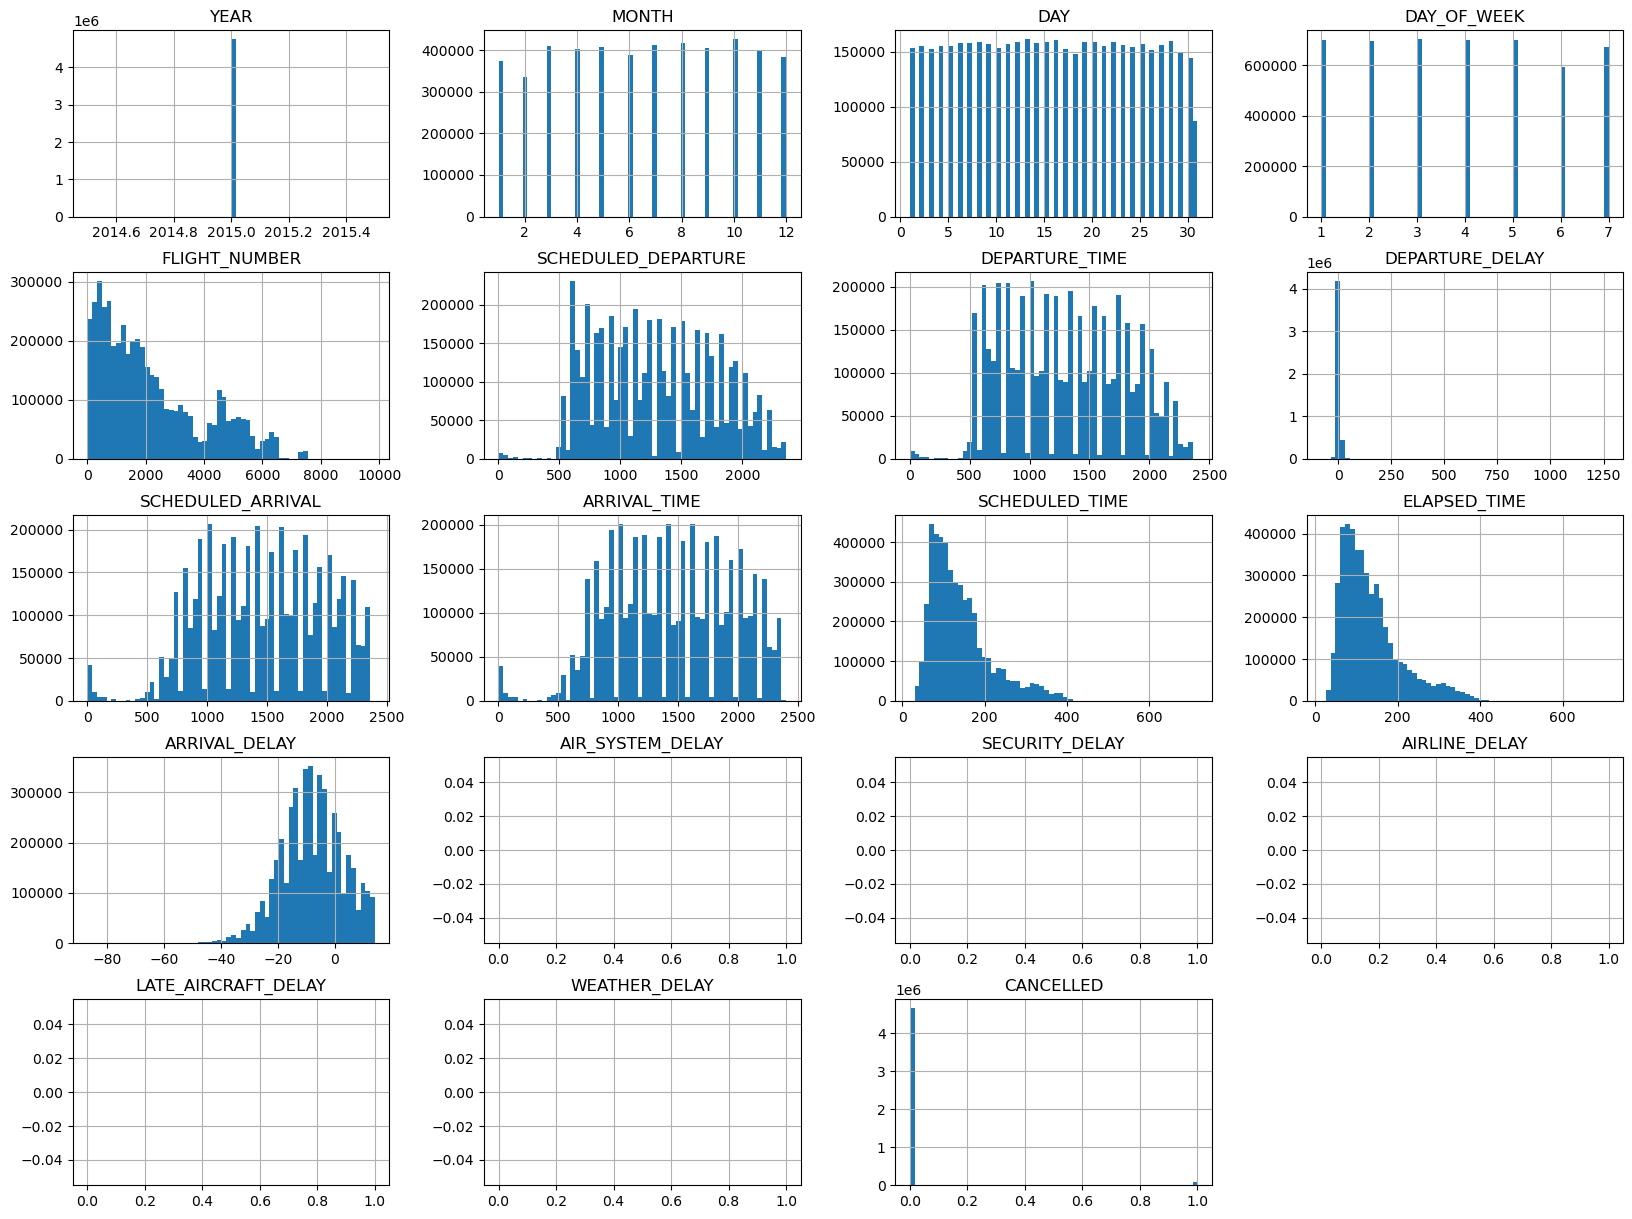

In [32]:
na_values.hist(bins=60, figsize=(20,15))

In [36]:
non_na_values = flights[~flights['AIR_SYSTEM_DELAY'].isna()]
non_na_values.shape

(1063439, 23)

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'FLIGHT_NUMBER'}>,
        <Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>],
       [<Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'SCHEDULED_TIME'}>,
        <Axes: title={'center': 'ELAPSED_TIME'}>],
       [<Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>],
       [<Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>, <Axes: >]], dtype=object)

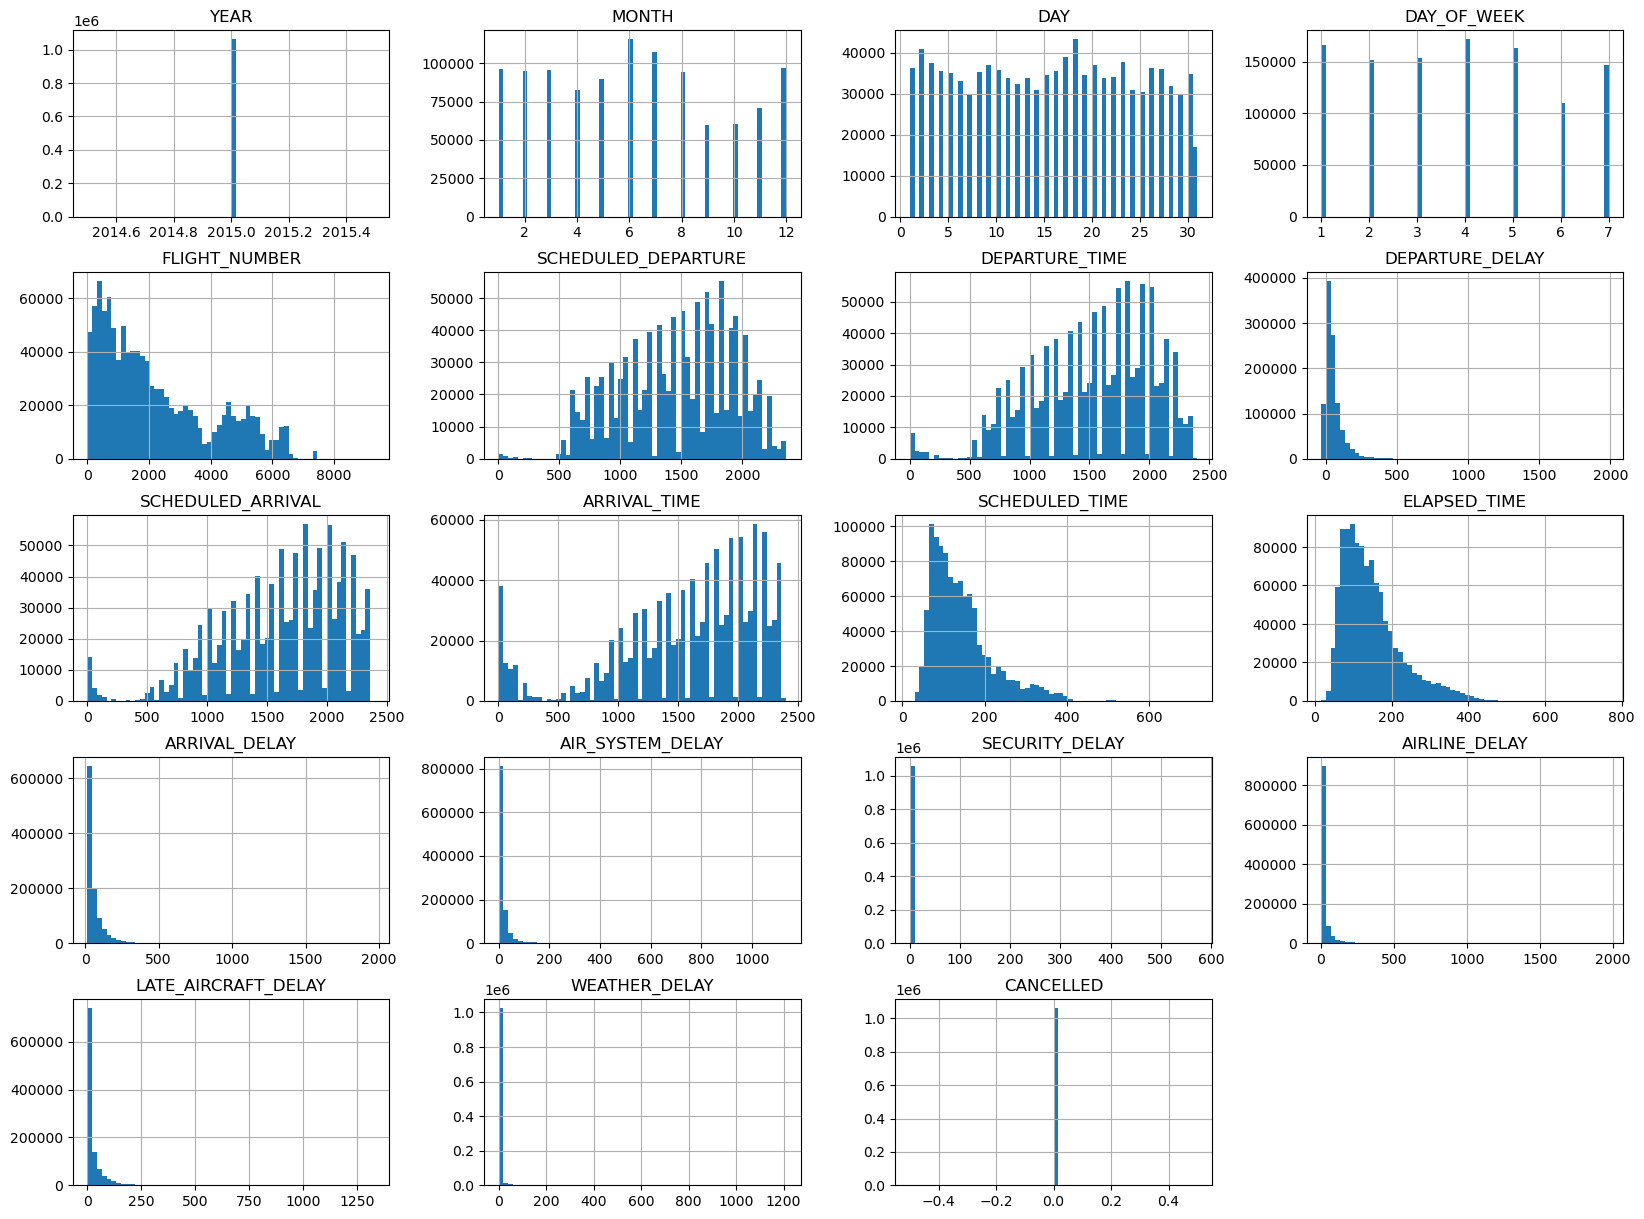

In [38]:
non_na_values.hist(bins=60, figsize=(20,15))

In [39]:
late_flights = flights[flights['ARRIVAL_DELAY']<15]
late_flights.shape

(4650569, 23)

In [42]:
late_flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
ARRIVAL_DELAY                0
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
CANCELLED                    0
CANCELLATION_REASON    4650569
dtype: int64

## 
Observation: We assume only flights that are later than 15 mins to arrive to be late.

What about the missing values for ARRIVAL_DELAY?

In [44]:
arrival_na = flights[flights['ARRIVAL_DELAY'].isna()]
arrival_na

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
32,2015,1,1,4,AS,136,ANC,SEA,135,NaN,NaN,600,NaN,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
42,2015,1,1,4,AA,2459,PHX,DFW,200,NaN,NaN,500,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
68,2015,1,1,4,OO,5254,MAF,IAH,510,NaN,NaN,637,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
82,2015,1,1,4,MQ,2859,SGF,DFW,525,NaN,NaN,700,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
90,2015,1,1,4,OO,5460,RDD,SFO,530,NaN,NaN,700,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818157,2015,12,31,4,UA,222,SFO,LAX,2000,NaN,NaN,2136,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
5818160,2015,12,31,4,WN,5296,MDW,ABQ,2000,2013.0,13.0,2215,2325.0,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5818318,2015,12,31,4,AA,2245,MIA,SAN,2019,NaN,NaN,2256,NaN,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
5818777,2015,12,31,4,NK,416,FLL,IAG,2155,NaN,NaN,50,NaN,175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A


In [46]:
arrival_na['CANCELLED'].value_counts()

CANCELLED
1    89884
0    15187
Name: count, dtype: int64

In [48]:
arrival_na_not_cancelled = arrival_na[arrival_na['CANCELLED']==0]
arrival_na_not_cancelled

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
724,2015,1,1,4,DL,716,OMA,ATL,645,637.0,-8.0,1009,1451.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1455,2015,1,1,4,OO,5237,MKE,IAH,745,742.0,-3.0,1041,1505.0,176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2218,2015,1,1,4,WN,1966,ATL,JAX,845,922.0,37.0,1000,1219.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2526,2015,1,1,4,EV,4555,IAH,HRL,902,859.0,-3.0,1017,1319.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2866,2015,1,1,4,WN,1081,MDW,OKC,930,926.0,-4.0,1135,1343.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813860,2015,12,31,4,UA,1291,LIH,LAX,1405,1901.0,296.0,2141,NaN,336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5815052,2015,12,31,4,EV,2785,DFW,BRO,1530,1555.0,25.0,1720,NaN,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5816657,2015,12,31,4,UA,291,IAD,SMF,1735,1740.0,5.0,2026,2216.0,351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5817342,2015,12,31,4,MQ,3060,DFW,FAR,1830,1840.0,10.0,2113,2250.0,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


We can calculate the arrival_delay but we do not know what the reason for the delay is. The missing information is only 2%.

In [52]:
arrival_na_not_cancelled[arrival_na_not_cancelled['ARRIVAL_TIME'].isna()].shape

(2629, 23)

## Steps to take

1. Remove rows where the arrival delay is missing (most of them are cancelled flights)
2. Fill in nan values for delay reasons with zeros

In [54]:
flights = flights[~flights['ARRIVAL_DELAY'].isna()]
flights.shape

(5714008, 23)

In [56]:
flights[flights['SCHEDULED_TIME'].isna()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON


In [58]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
ARRIVAL_DELAY                0
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
CANCELLED                    0
CANCELLATION_REASON    5714008
dtype: int64

In [60]:
flights = flights.fillna(0)
flights.isna().sum()

/var/folders/sv/d17v64fx33j6dfgwbpf9l9bw0000gn/T/ipykernel_5743/121928331.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flights = flights.fillna(0)


YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
SCHEDULED_TIME         0
ELAPSED_TIME           0
ARRIVAL_DELAY          0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
CANCELLED              0
CANCELLATION_REASON    0
dtype: int64

 ## Visualize your data to explore it

Histograms are a great way to take a first look at your data.

A histogram will show the amount of times (y-axis) a certain value (x-axis) has occurred in the data. The span of the x-axis includes all the values. So when you see a histogram where, seemingly, only one value (e.g. 0) is represented, yet the x-axis spans until 100, this means there are some values that are around 100. Only that their occurrence is so low that in the graph they are invisible.

This might point to some outliers and tells us that we need to take a closer look at these columns.

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'FLIGHT_NUMBER'}>,
        <Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>],
       [<Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'SCHEDULED_TIME'}>,
        <Axes: title={'center': 'ELAPSED_TIME'}>],
       [<Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>],
       [<Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'CANCE

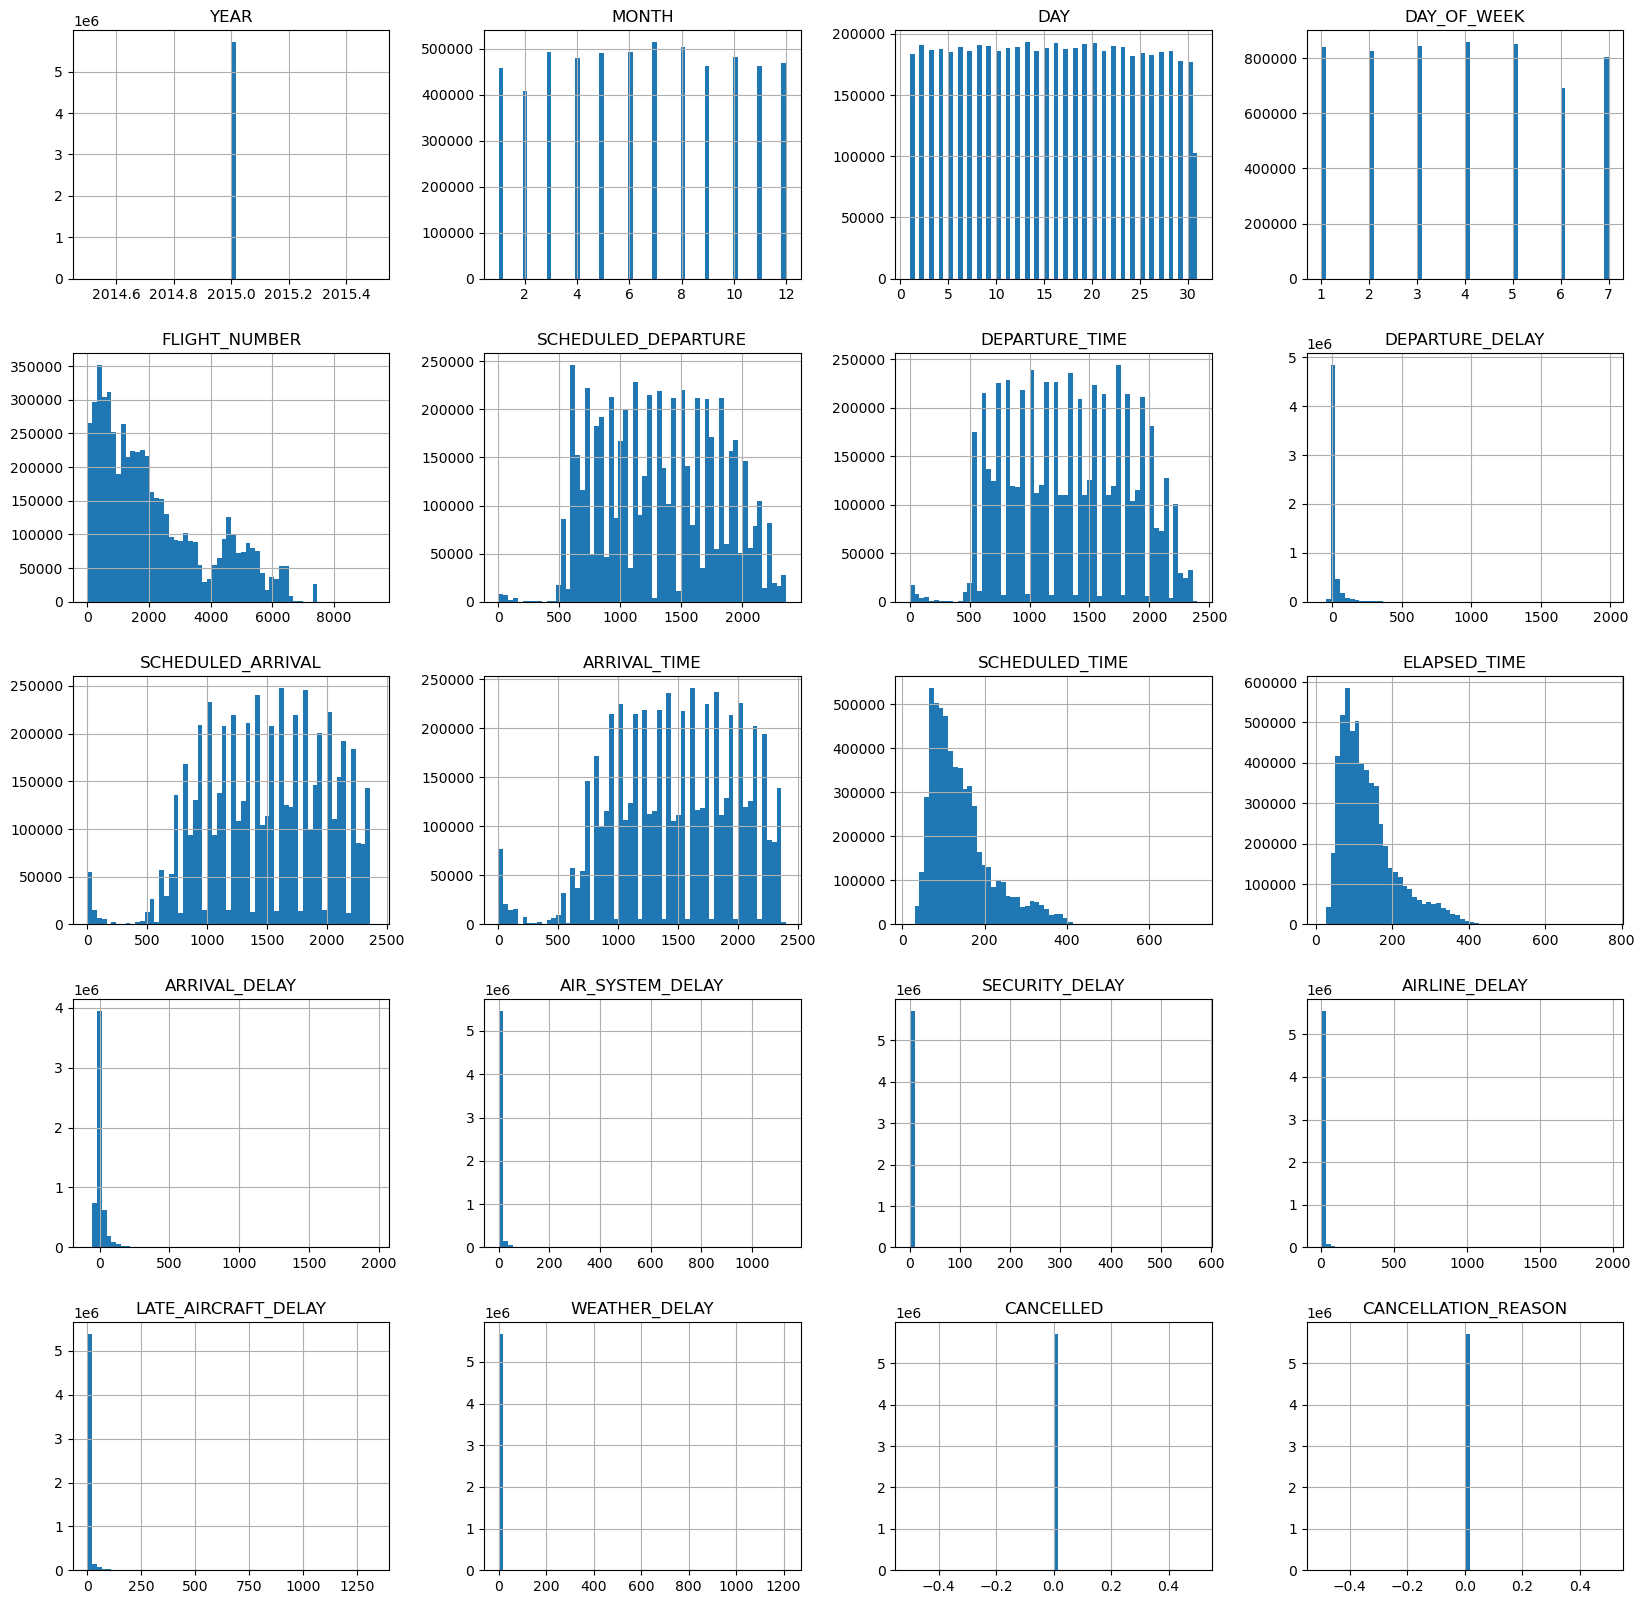

In [62]:
flights.hist(bins=60, figsize=(20,20))

In [64]:
flights[flights['ARRIVAL_DELAY']>1500]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
264495,2015,1,18,7,AA,224,LAS,LAX,1130,1414.0,1604.0,1246,1519.0,76.0,65.0,1593.0,0.0,0.0,1593.0,0.0,0.0,0,0
337720,2015,1,23,5,AA,1322,BHM,DFW,700,1608.0,1988.0,914,1805.0,134.0,117.0,1971.0,0.0,0.0,1971.0,0.0,0.0,0,0
396544,2015,1,27,2,AA,1242,FAT,DFW,659,850.0,1551.0,1210,1356.0,191.0,186.0,1546.0,0.0,0.0,1546.0,0.0,0.0,0,0
886984,2015,2,28,6,AA,1312,STL,MIA,620,847.0,1587.0,1008,1315.0,168.0,208.0,1627.0,40.0,0.0,1587.0,0.0,0.0,0,0
949876,2015,3,4,3,AA,270,HNL,LAX,828,1057.0,1589.0,1555,1811.0,327.0,314.0,1576.0,0.0,0.0,1576.0,0.0,0.0,0,0
1047179,2015,3,10,2,AA,1594,SAT,DFW,850,1047.0,1557.0,1000,1154.0,70.0,67.0,1554.0,0.0,0.0,1554.0,0.0,0.0,0,0
1278418,2015,3,24,2,AA,1279,OMA,DFW,1103,1352.0,1609.0,1255,1533.0,112.0,101.0,1598.0,0.0,0.0,1563.0,35.0,0.0,0,0
1290061,2015,3,25,3,AA,1126,SMF,DFW,625,748.0,1523.0,1149,1303.0,204.0,195.0,1514.0,0.0,0.0,1514.0,0.0,0.0,0,0
1841449,2015,4,28,2,AA,94,SAN,JFK,745,927.0,1542.0,1615,1809.0,330.0,342.0,1554.0,12.0,0.0,838.0,704.0,0.0,0,0
2739880,2015,6,22,1,AA,96,RIC,DFW,715,837.0,1522.0,920,1028.0,185.0,171.0,1508.0,0.0,0.0,1508.0,0.0,0.0,0,0


In [66]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
CANCELLED                int64
CANCELLATION_REASON      int64
dtype: object

Sometimes there are problems with the data we might not see. One way to figure it out is to look at the types of the columns. If we know a column should be float but it is specific as object (aka string), it is an indication that there is something wrong with it.

Let's see what exactly is wrong by trying to convert it to a numeric column.

In [68]:
flights['SECURITY_DELAY'] = pd.to_numeric(flights['SECURITY_DELAY'])

In [70]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
CANCELLED                int64
CANCELLATION_REASON      int64
dtype: object

In [72]:
flights.iloc[264495]

YEAR                     2015
MONTH                       1
DAY                        18
DAY_OF_WEEK                 7
AIRLINE                    WN
FLIGHT_NUMBER            2872
ORIGIN_AIRPORT            RSW
DESTINATION_AIRPORT       BNA
SCHEDULED_DEPARTURE      1805
DEPARTURE_TIME         1803.0
DEPARTURE_DELAY          -2.0
SCHEDULED_ARRIVAL        1915
ARRIVAL_TIME           1910.0
SCHEDULED_TIME          130.0
ELAPSED_TIME            127.0
ARRIVAL_DELAY            -5.0
AIR_SYSTEM_DELAY          0.0
SECURITY_DELAY            0.0
AIRLINE_DELAY             0.0
LATE_AIRCRAFT_DELAY       0.0
WEATHER_DELAY             0.0
CANCELLED                   0
CANCELLATION_REASON         0
Name: 270658, dtype: object

Here we are making sure that the airline and flight number columns have a good distribution. If only a couple of airlines/flight numbers are represented heavily in the data and other not many times, it will not serve us well to include this information in the model training.

It is also good to take a look at the distribution of categorical values to make sure there aren't any values that look like they don't belong.



Make sure categorical values are clean
We don't need to include the flight number because it is represented with: airline name, rotue and time of flight.

<Axes: xlabel='AIRLINE'>

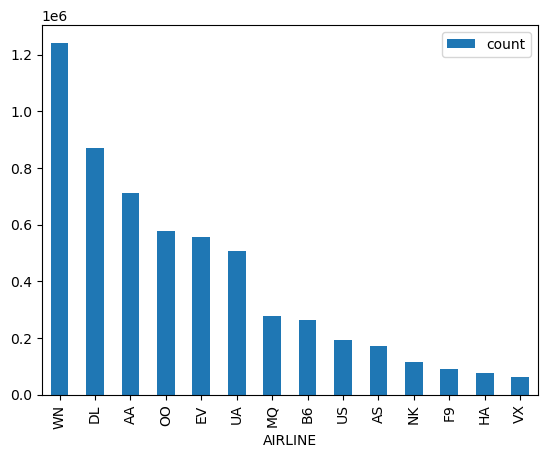

In [74]:
pd.DataFrame(flights.value_counts("AIRLINE")).plot(kind='bar')

## Preparing the target feature

Sometimes, based on our end-goal, we need to combine multiple columns to create the target feature. For this problem we are looking for the type of delay that caused the main delay for this flight.

This way, we are setting up this problem as a classification problem.

In [76]:
flights['all_delay'] = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum(axis=1)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON,all_delay
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,430,408.0,205.0,194.0,-22.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,750,741.0,280.0,279.0,-9.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,806,811.0,286.0,293.0,5.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,805,756.0,285.0,281.0,-9.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,320,259.0,235.0,215.0,-21.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0


In [78]:
flights['delay_reason'] = np.where(flights['all_delay']>0, flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].idxmax(axis=1), 'NO_DELAY')

In [80]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON,all_delay,delay_reason
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,430,408.0,205.0,194.0,-22.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,750,741.0,280.0,279.0,-9.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,806,811.0,286.0,293.0,5.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,805,756.0,285.0,281.0,-9.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,320,259.0,235.0,215.0,-21.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,LAX,BOS,2359,2355.0,-4.0,819,753.0,320.0,298.0,-26.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY
5819075,2015,12,31,4,B6,745,JFK,PSE,2359,2355.0,-4.0,446,430.0,227.0,215.0,-16.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY
5819076,2015,12,31,4,B6,1503,JFK,SJU,2359,2350.0,-9.0,440,432.0,221.0,222.0,-8.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY
5819077,2015,12,31,4,B6,333,MCO,SJU,2359,2353.0,-6.0,340,330.0,161.0,157.0,-10.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY


In [82]:
flights['delay_reason'].value_counts()

delay_reason
NO_DELAY               4650569
LATE_AIRCRAFT_DELAY     410647
AIRLINE_DELAY           311386
AIR_SYSTEM_DELAY        303784
WEATHER_DELAY            35711
SECURITY_DELAY            1911
Name: count, dtype: int64

<Axes: >

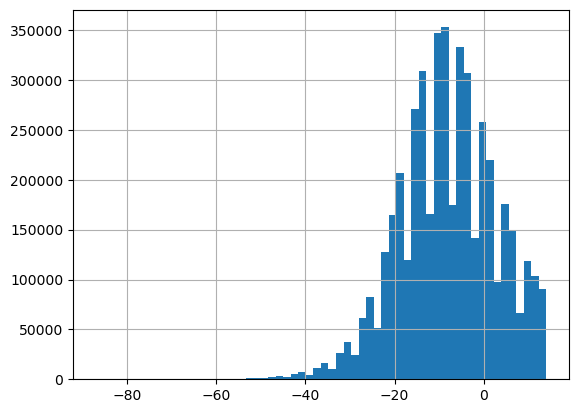

In [84]:
flights[flights['delay_reason'] == 'NO_DELAY']['ARRIVAL_DELAY'].hist(bins=60)

In [81]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'ARRIVAL_DELAY',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLED',
       'CANCELLATION_REASON', 'all_delay', 'delay_reason'],
      dtype='object')

In [86]:
training_data = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'delay_reason']]

In [88]:
training_data.dtypes

YEAR                    int64
MONTH                   int64
DAY                     int64
DAY_OF_WEEK             int64
AIRLINE                object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE     int64
delay_reason           object
dtype: object

In [90]:
X_flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE']]
#One-hot encoding on the X_flights dataset
X_flights = pd.get_dummies(X_flights)
y_flights = flights[['delay_reason']]
# y_flights = pd.get_dummies(y_flights)

In [94]:
X_flights

YEAR  MONTH  DAY  DAY_OF_WEEK  SCHEDULED_DEPARTURE  AIRLINE_AA  \
0        2015      1    1            4                    5       False   
1        2015      1    1            4                   10        True   
2        2015      1    1            4                   20       False   
3        2015      1    1            4                   20        True   
4        2015      1    1            4                   25       False   
...       ...    ...  ...          ...                  ...         ...   
5819074  2015     12   31            4                 2359       False   
5819075  2015     12   31            4                 2359       False   
5819076  2015     12   31            4                 2359       False   
5819077  2015     12   31            4                 2359       False   
5819078  2015     12   31            4                 2359       False   

         AIRLINE_AS  AIRLINE_B6  AIRLINE_DL  AIRLINE_EV  AIRLINE_F9  \
0              True       False       False       False       False   
1             False       False       False       False       False   
2             False       False       False       False       False   
3             False       False       False       False       False   
4              True       False       False       False       False   
...             ...         ...         ...         ...         ...   
5819074       False        True       False       False       False   
5819075       False        True       False       False       False   
5819076       False        True       False       False       False   
5819077       False        True       False       False       False   
5819078       False        True       False       False       False   

         AIRLINE_HA  AIRLINE_MQ  AIRLINE_NK  AIRLINE_OO  AIRLINE_UA  \
0             False       False       False       False       False   
1             False       False       False       False       False   
2             False       False       False       False       False   
3             False       False       False       False       False   
4             False       False       False       False       False   
...             ...         ...         ...         ...         ...   
5819074       False       False       False       False       False   
5819075       False       False       False       False       False   
5819076       False       False       False       False       False   
5819077       False       False       False       False       False   
5819078       False       False       False       False       False   

         AIRLINE_US  AIRLINE_VX  AIRLINE_WN  ORIGIN_AIRPORT_10135  \
0             False       False       False                 False   
1             False       False       False                 False   
2              True       False       False                 False   
3             False       False       False                 False   
4             False       False       False                 False   
...             ...         ...         ...                   ...   
5819074       False       False       False                 False   
5819075       False       False       False                 False   
5819076       False       False       False                 False   
5819077       False       False       False                 False   
5819078       False       False       False                 False   

         ORIGIN_AIRPORT_10136  ORIGIN_AIRPORT_10140  ORIGIN_AIRPORT_10141  \
0                       False                 False                 False   
1                       False                 False                 False   
2                       False                 False                 False   
3                       False                 False                 False   
4                       False                 False                 False   
...                       ...                   ...                   ...   
5819074                 False     

## Model training with Scikit-learn

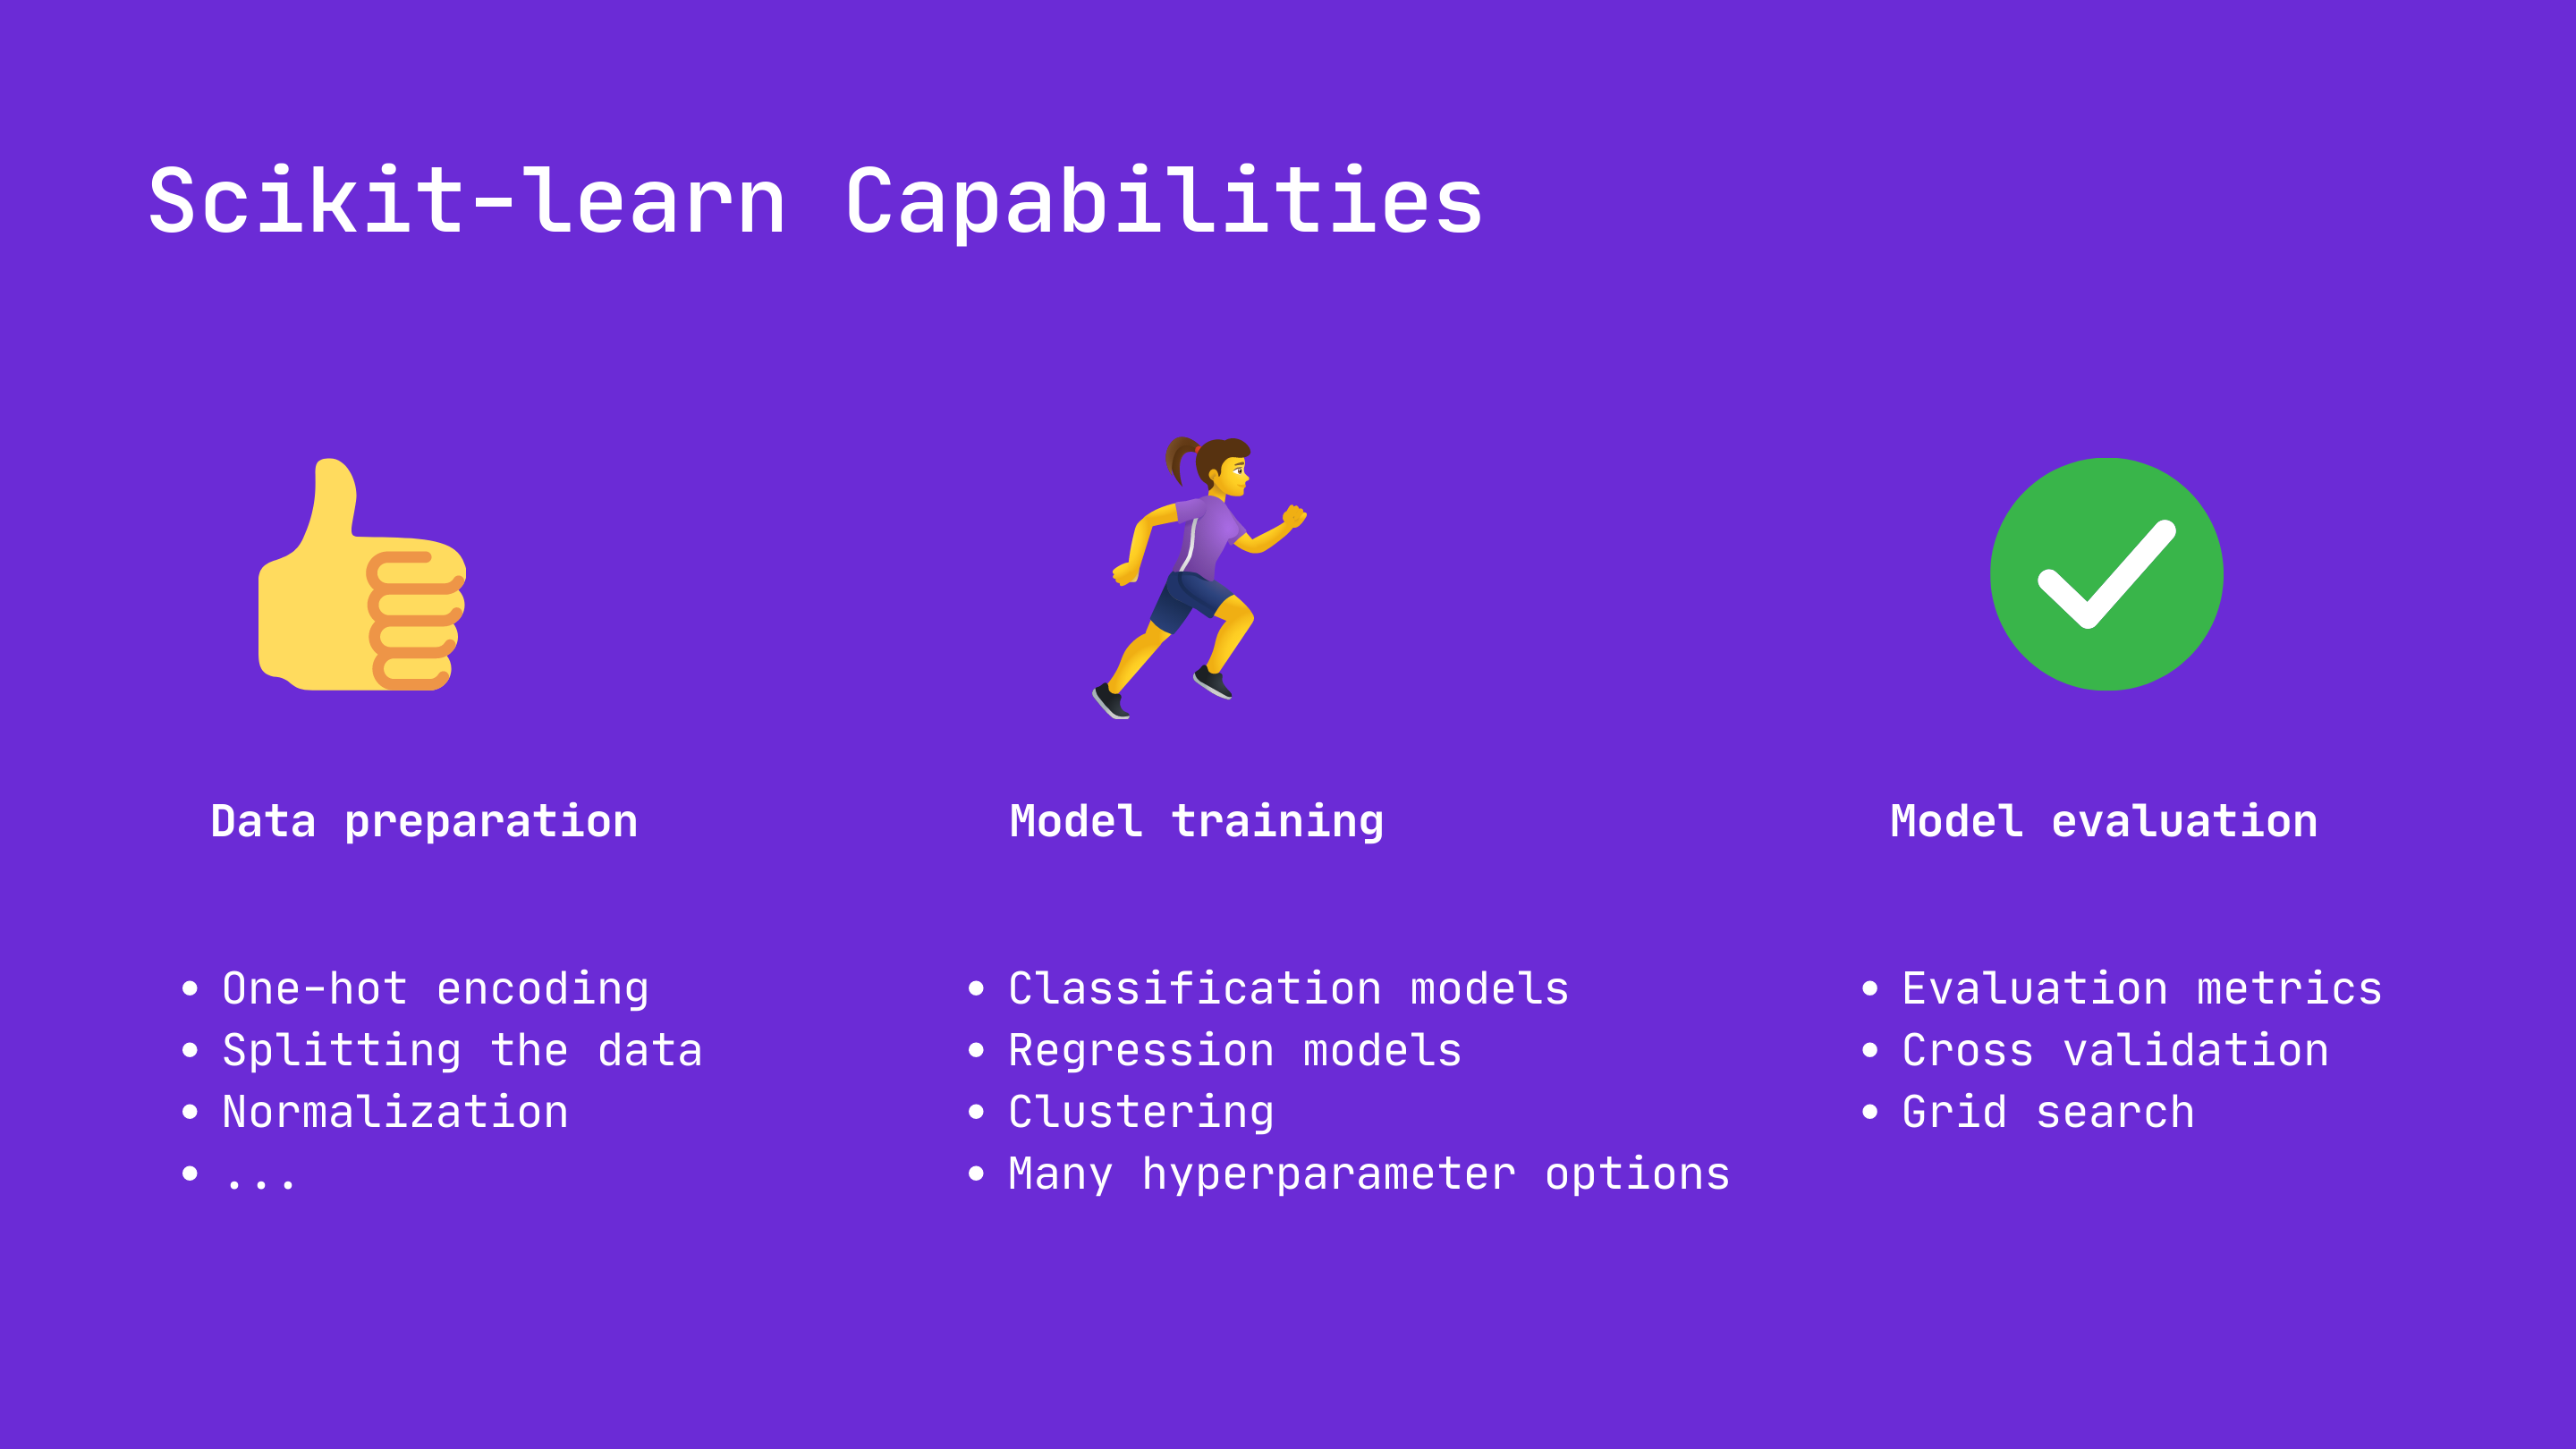

## Importing data

In [96]:
# https://scikit-learn.org/stable/datasets/toy_dataset.html

from sklearn.datasets import load_iris
data = load_iris()

# https://scikit-learn.org/stable/datasets/real_world.html

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups()

## Splitting into train and test datasets

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_flights, y_flights, test_size=0.30, random_state=15)

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=15)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=15)


NameError: name 'X_resampled' is not defined

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [2]:
y_train.value_counts()

NameError: name 'y_train' is not defined